# **🏠 Real Estate Price Prediction & Fraud Detection**

# Project Introduction

This project predicts real estate prices and detects fraudulent listings using Machine Learning.  

📅 *Start Date:* 15 Aug 2025  
👨‍💻 *Developer:* Subhranil Dutta  

---

## 📌 Project Goals
1. Predict property prices accurately using historical data and market trends.  
2. Detect fraudulent property listings to prevent scams.  
3. Learn and implement the complete end-to-end ML workflow.

---

## 💡 Why This Project Matters
Real estate is one of the world’s largest industries, but pricing transparency and fraud detection remain major challenges.  
This project uses AI to predict prices and spot unusual or fake listings, helping buyers, sellers, and property websites make safer and smarter choices.

---

## 📂 Dataset Information
- *Source:*   [Kaggle – India House Price Prediction](https://www.kaggle.com/datasets/ankushpanday1/india-house-price-prediction)  
- *Size:* 39.2 MB
- *Format:* CSV  
- *Features Include:* Location, Area, Bedrooms, Bathrooms, Year Built, Amenities, Furnishing, Listing Type, Price.

---

## 🛠 Tech Stack
- *Language:* Python  
- *Libraries:* Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
- *Environment:* Google Colab  

---


# **Phase 0 – Data Foundation & Preprocessing**

# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Load the Dataset

In [ ]:
housing=pd.read_csv('india_housing_prices.csv')

In [ ]:
housing.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


# Initial Data Exploration

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Size_in_SqFt'}>],
       [<Axes: title={'center': 'Price_in_Lakhs'}>,
        <Axes: title={'center': 'Price_per_SqFt'}>,
        <Axes: title={'center': 'Year_Built'}>],
       [<Axes: title={'center': 'Floor_No'}>,
        <Axes: title={'center': 'Total_Floors'}>,
        <Axes: title={'center': 'Age_of_Property'}>],
       [<Axes: title={'center': 'Nearby_Schools'}>,
        <Axes: title={'center': 'Nearby_Hospitals'}>, <Axes: >]],
      dtype=object)

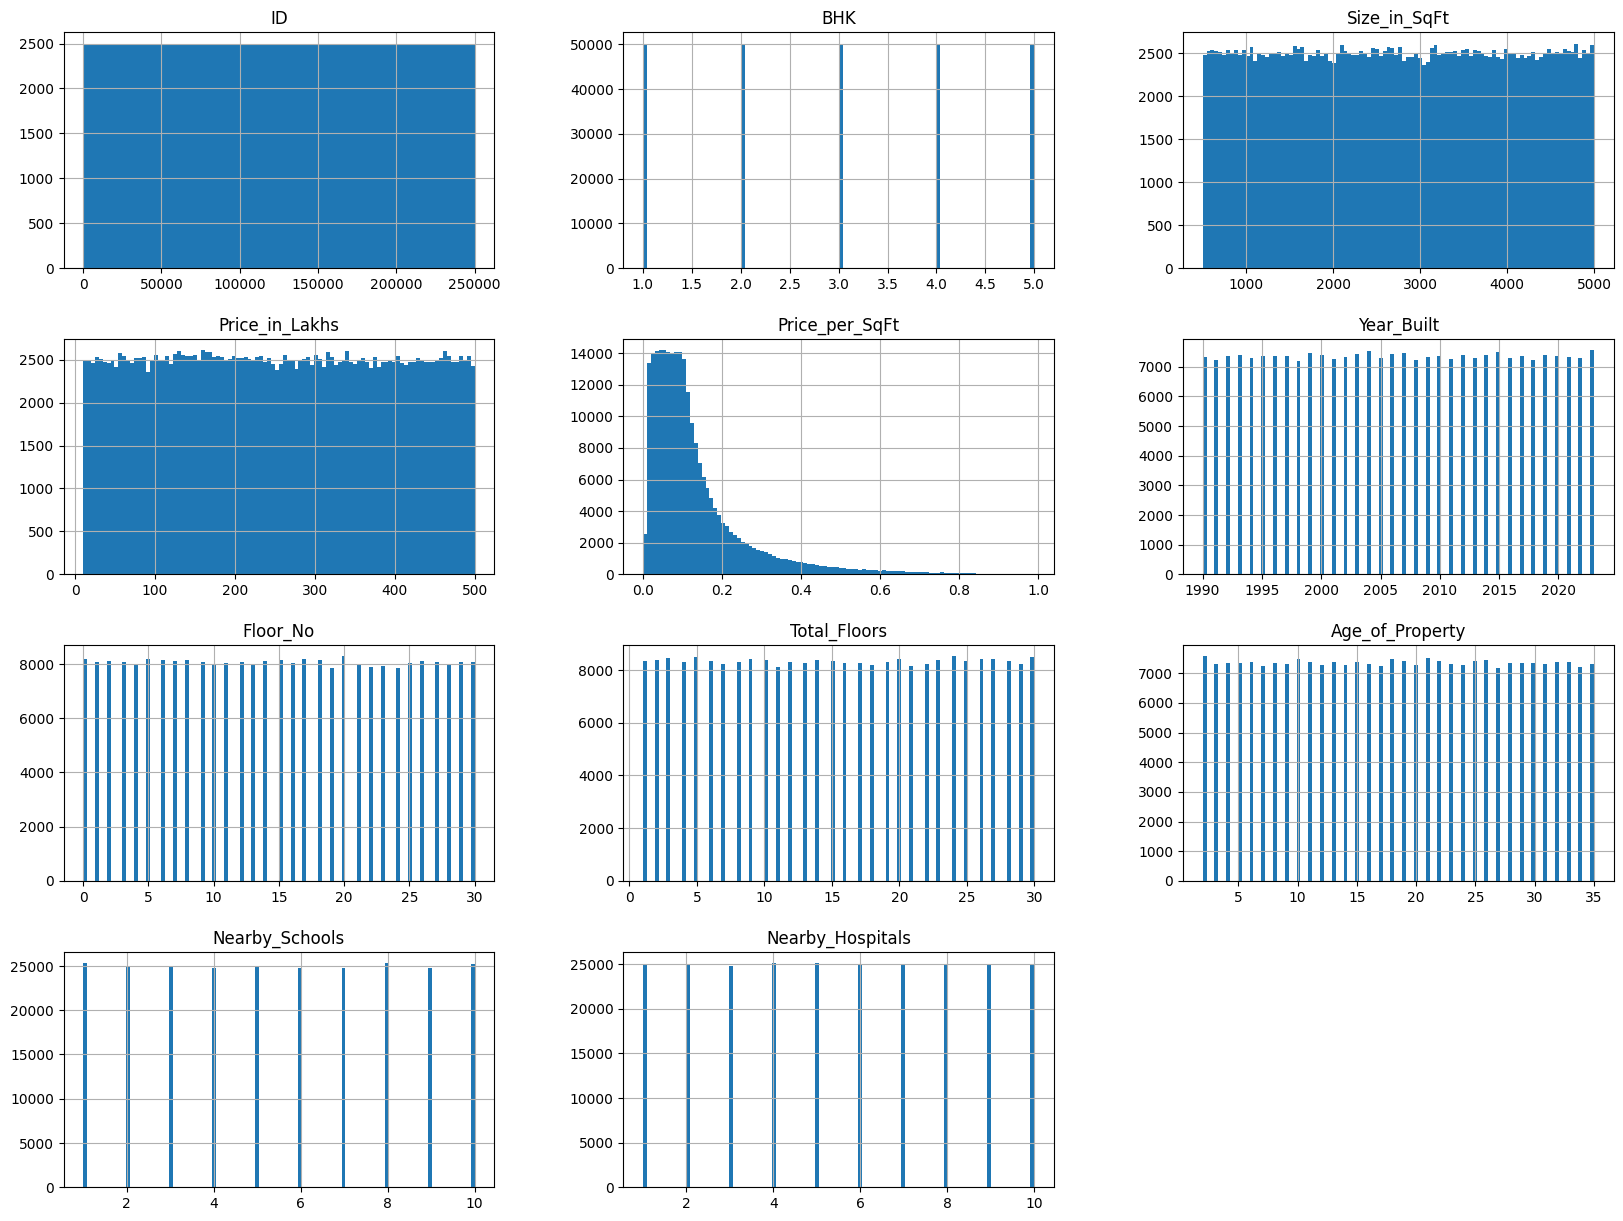

In [ ]:
housing.hist(figsize=(20,15),bins=100)

<Axes: ylabel='Density'>

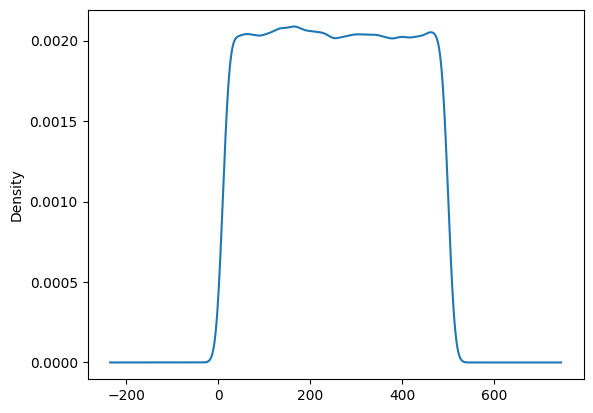

In [ ]:
housing['Price_in_Lakhs'].plot.kde()

# Explore Categorical Features

In [ ]:
cat_cols=housing.select_dtypes(include='object').columns
cat_cols

Index(['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

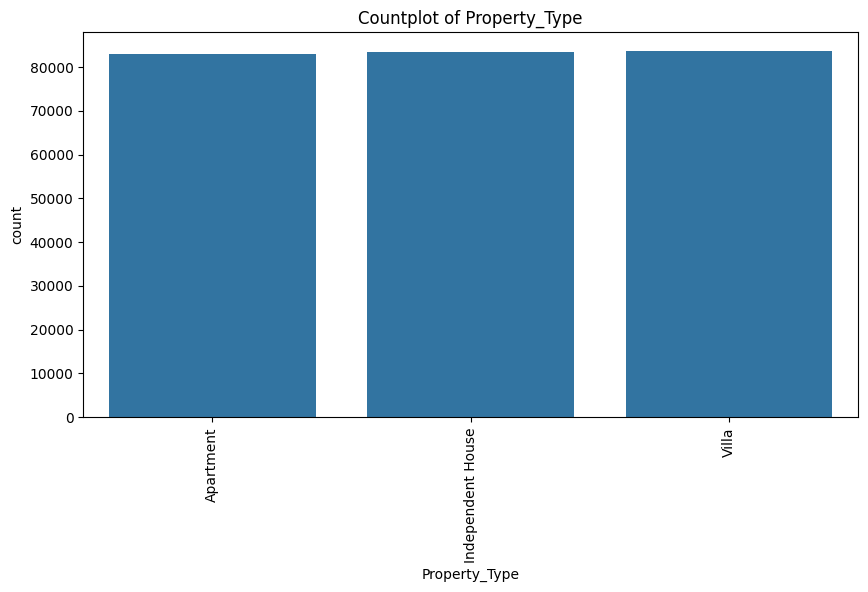

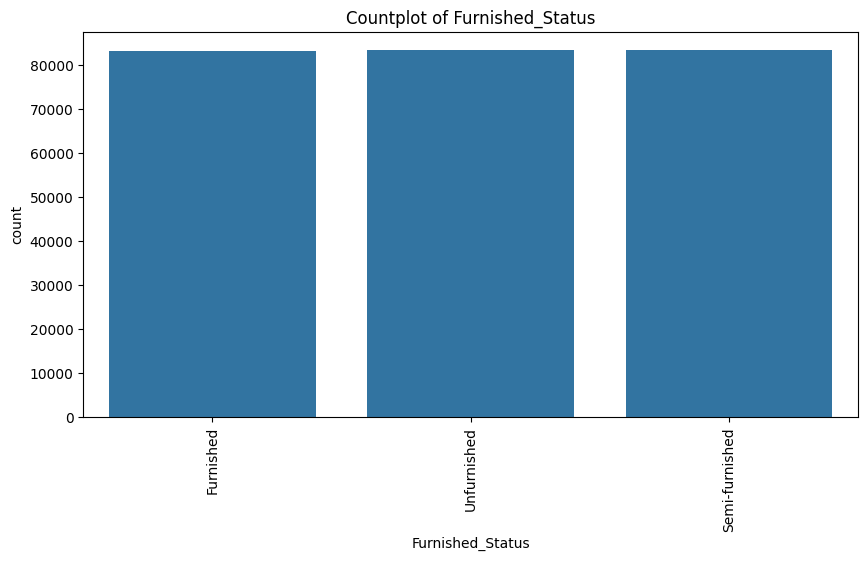

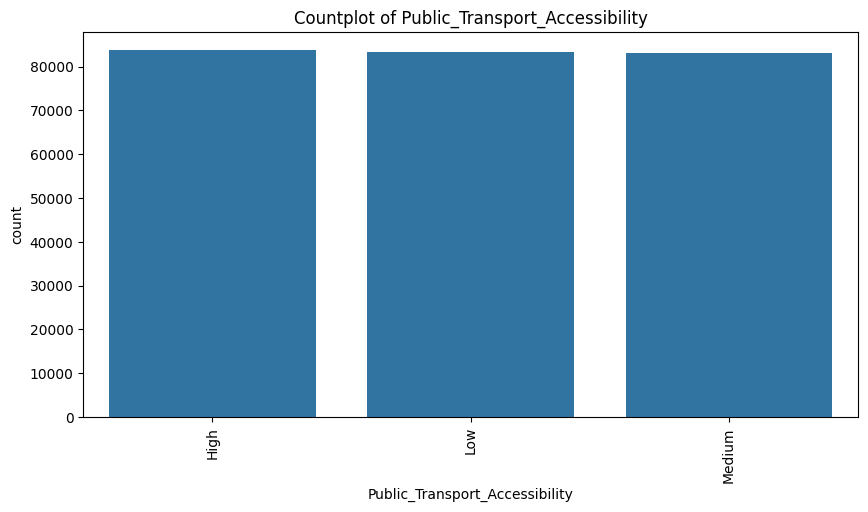

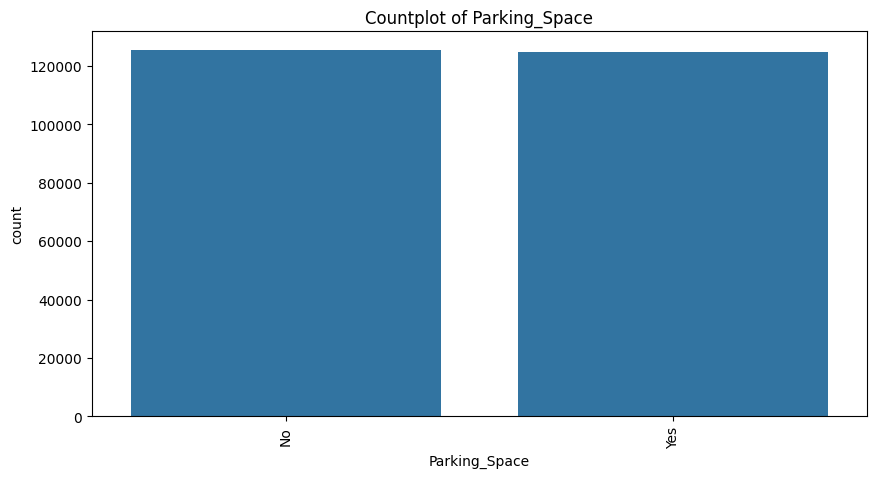

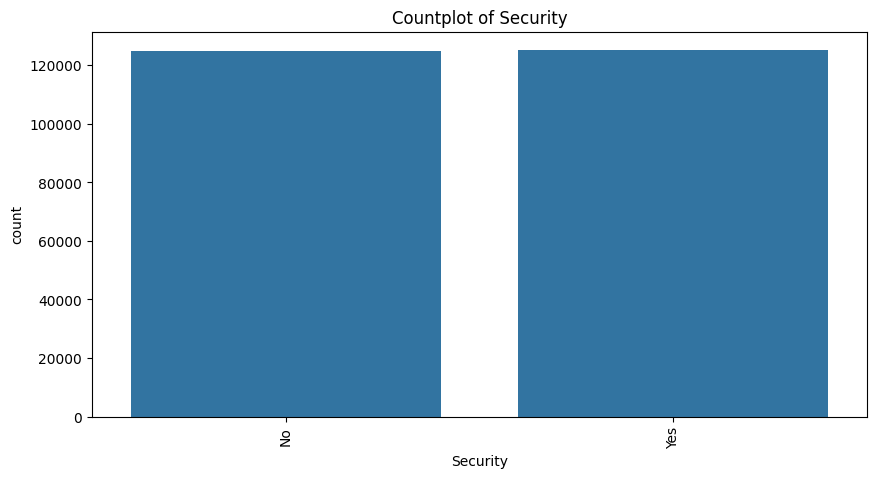

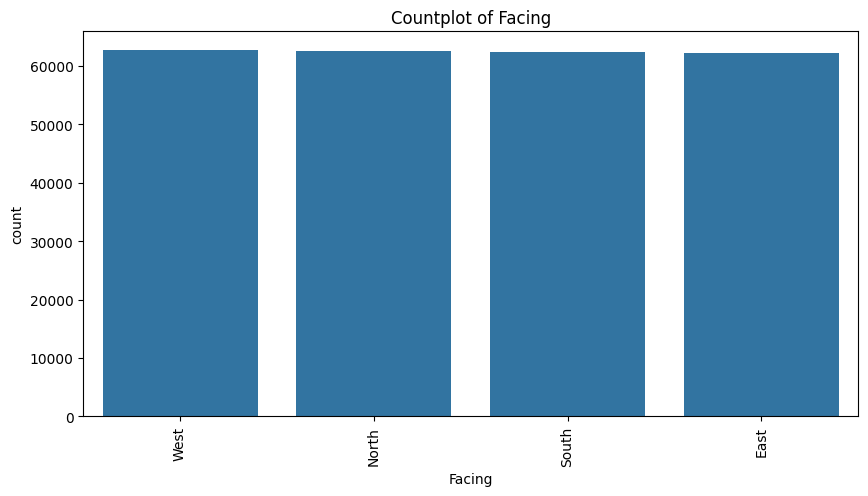

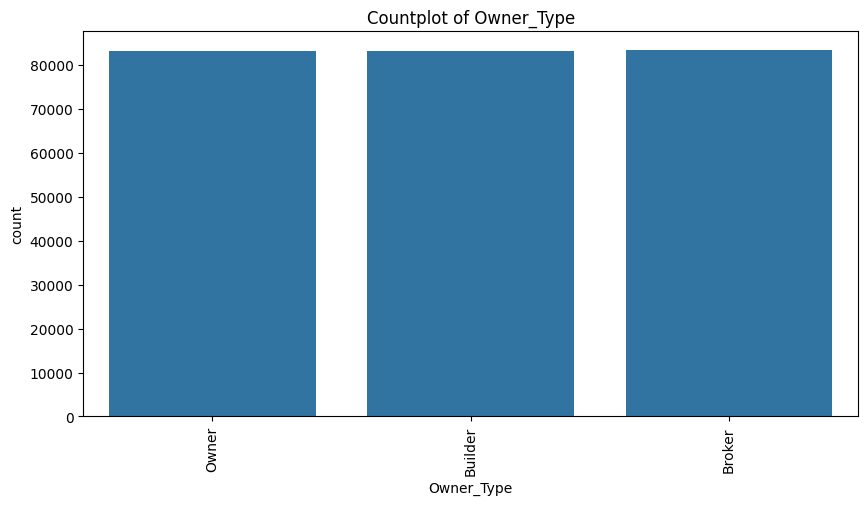

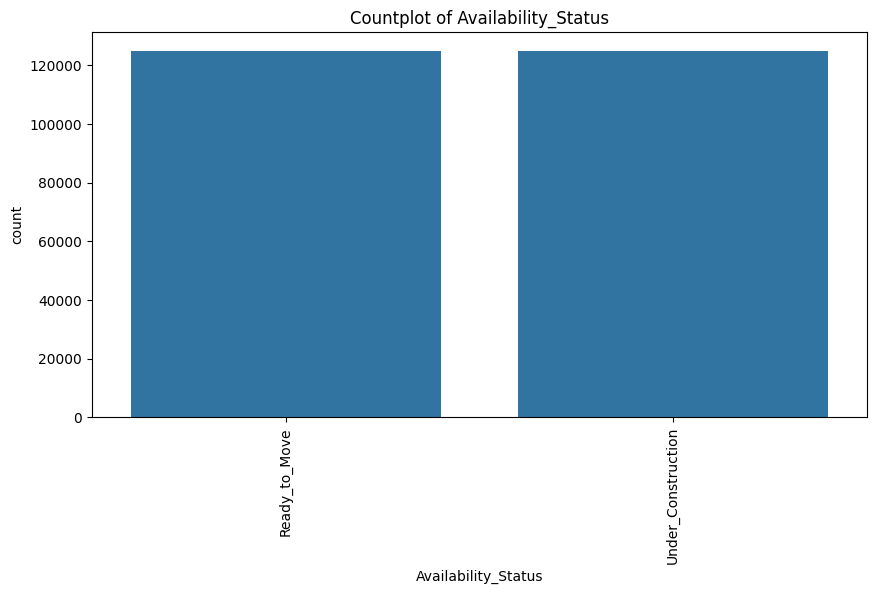

In [ ]:
cat_cols=[col for col in cat_cols if housing[col].nunique()<=15]
for col in cat_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=housing)
  order=housing[col].value_counts().index
  plt.xticks(rotation=90)
  plt.title(f'Countplot of {col}')
  plt.show()

# Summary Statistics and Dataset Info

In [ ]:
housing.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

# Karl Pearson Correlation Coefficient

In [ ]:
num_cols=housing.select_dtypes(include=['int64','float64']).columns
corr_matrix=housing[num_cols].corr()
corr_matrix

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
ID,1.000000,-0.001718,-0.002293,-0.001636,-0.001344,0.002734,-0.000214,0.003382,-0.002734,-0.001203,0.001429
BHK,-0.001718,1.000000,-0.001033,-0.000980,0.001174,0.000917,0.001263,-0.002862,-0.000917,-0.000762,0.001162
Size_in_SqFt,-0.002293,-0.001033,1.000000,-0.002529,-0.614533,0.004135,-0.002775,-0.003451,-0.004135,0.001966,-0.001695
Price_in_Lakhs,-0.001636,-0.000980,-0.002529,1.000000,0.555625,0.002714,-0.001719,0.001283,-0.002714,0.000155,-0.002769
Price_per_SqFt,-0.001344,0.001174,-0.614533,0.555625,1.000000,-0.001212,-0.001906,0.004175,0.001212,-0.000094,-0.000145
Year_Built,0.002734,0.000917,0.004135,0.002714,-0.001212,1.000000,-0.000686,0.003452,-1.000000,-0.000591,-0.002719
Floor_No,-0.000214,0.001263,-0.002775,-0.001719,-0.001906,-0.000686,1.000000,0.001169,0.000686,-0.000635,0.001428
Total_Floors,0.003382,-0.002862,-0.003451,0.001283,0.004175,0.003452,0.001169,1.000000,-0.003452,-0.003093,-0.005867
Age_of_Property,-0.002734,-0.000917,-0.004135,-0.002714,0.001212,-1.000000,0.000686,-0.003452,1.000000,0.000591,0.002719
Nearby_Schools,-0.001203,-0.000762,0.001966,0.000155,-0.000094,-0.000591,-0.000635,-0.003093,0.000591,1.000000,-0.002246


In [ ]:
corr_matrix['Price_in_Lakhs'].sort_values(ascending=False)

,Price_in_Lakhs
Price_in_Lakhs,1.000000
Price_per_SqFt,0.555625
Year_Built,0.002714
Total_Floors,0.001283
Nearby_Schools,0.000155
BHK,-0.000980
ID,-0.001636
Floor_No,-0.001719
Size_in_SqFt,-0.002529
Age_of_Property,-0.002714


In [ ]:
housing['Price_per_SqFt'].min(),housing['Price_per_SqFt'].max()

(0.0, 0.99)

In [ ]:
len(np.unique(housing['Price_per_SqFt']))

100

In [ ]:
housing['income_cat']=np.ceil(housing['Price_per_SqFt'])

In [ ]:
housing['income_cat'].value_counts().sort_index()

,count
income_cat,
0.0,2534
1.0,247466


In [ ]:
housing['income_cat'].value_counts().sort_index()/len(housing)

,count
income_cat,
0.0,0.010136
1.0,0.989864


# Shuffling and Splitting for Regression

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]
strat_train_set.shape,strat_test_set.shape

((200000, 24), (50000, 24))

In [ ]:
strat_train_set['income_cat'].value_counts().sort_index()/len(strat_train_set)

,count
income_cat,
0.0,0.010135
1.0,0.989865


In [ ]:
strat_test_set['income_cat'].value_counts().sort_index()/len(strat_test_set)

,count
income_cat,
0.0,0.01014
1.0,0.98986


In [ ]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [ ]:
strat_train_set.shape,strat_test_set.shape

((200000, 23), (50000, 23))

In [ ]:
X_train_reg=strat_train_set.drop('Price_in_Lakhs',axis=1)
y_train_reg=strat_train_set['Price_in_Lakhs'].copy()

In [ ]:
X_test_reg=strat_test_set.drop('Price_in_Lakhs',axis=1)
y_test_reg=strat_test_set['Price_in_Lakhs'].copy()

In [ ]:
X_train_reg.shape,y_train_reg.shape

((200000, 22), (200000,))

In [ ]:
X_test_reg.shape,y_test_reg.shape

((50000, 22), (50000,))

# Data Preprocessing

In [ ]:
X_train_num=X_train_reg.select_dtypes(include=['int64','float64'])
X_train_num[:5]

,ID,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
169532,169533,3,1630,0.02,2012,17,15,13,8,6
111989,111990,2,4573,0.01,2008,24,17,17,6,3
198798,198799,1,3133,0.08,1997,2,15,28,6,4
46962,46963,5,2089,0.09,1990,25,18,35,8,1
106552,106553,2,2635,0.13,1997,9,6,28,3,10


In [ ]:
X_train_cat=X_train_reg.select_dtypes(include='object')
X_train_cat[:5]

,State,City,Locality,Property_Type,Furnished_Status,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
169532,Uttar Pradesh,Noida,Locality_294,Independent House,Furnished,Low,No,Yes,"Pool, Gym, Clubhouse, Garden",North,Owner,Under_Construction
111989,Odisha,Bhubaneswar,Locality_12,Apartment,Semi-furnished,Medium,No,Yes,"Pool, Garden, Playground",West,Broker,Under_Construction
198798,Gujarat,Ahmedabad,Locality_191,Independent House,Unfurnished,High,No,No,Clubhouse,East,Builder,Ready_to_Move
46962,Maharashtra,Nagpur,Locality_326,Independent House,Furnished,High,Yes,Yes,"Pool, Gym, Playground, Garden, Clubhouse",North,Broker,Under_Construction
106552,Tamil Nadu,Chennai,Locality_121,Independent House,Unfurnished,Medium,No,No,"Playground, Garden, Clubhouse, Gym",East,Broker,Under_Construction


# Pipleline

# Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):

  # Constructor
  def __init__(self,attribute_names):
    self.attribute_names=attribute_names
  # Fit Method
  def fit(self,x,y=None):
    return self
  # Transform Method
  def transform(self,x):
    return x[self.attribute_names].values

dfs=DataFrameSelector(X_train_num.columns)
dfs.fit_transform(housing)[:5]

array([[   1.  ,    1.  , 4740.  ,    0.1 , 1990.  ,   22.  ,    1.  ,
          35.  ,   10.  ,    3.  ],
       [   2.  ,    3.  , 2364.  ,    0.08, 2008.  ,   21.  ,   20.  ,
          17.  ,    8.  ,    1.  ],
       [   3.  ,    2.  , 3642.  ,    0.05, 1997.  ,   19.  ,   27.  ,
          28.  ,    9.  ,    8.  ],
       [   4.  ,    2.  , 2741.  ,    0.11, 1991.  ,   21.  ,   26.  ,
          34.  ,    5.  ,    7.  ],
       [   5.  ,    4.  , 4823.  ,    0.04, 2002.  ,    3.  ,    2.  ,
          23.  ,    4.  ,    9.  ]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline,FeatureUnion
num_pipe=Pipeline([
    ('dfs',DataFrameSelector(X_train_num.columns)),
    ('scaler',StandardScaler())
])
cat_pipe=Pipeline([
    ('dfs',DataFrameSelector(X_train_cat.columns)),
    ('encoder',OneHotEncoder(sparse_output=False))
])
full_pipe=FeatureUnion(transformer_list=[
    ('num_pipe',num_pipe),
    ('cat_pipe',cat_pipe)
])

In [ ]:
X_train_prepared_reg=full_pipe.fit_transform(X_train_reg)
X_test_prepared_reg=full_pipe.transform(X_test_reg)

In [ ]:
X_train_prepared_reg[:5]

array([[ 0.61647691,  0.00263642, -0.86013468, ...,  1.        ,
         0.        ,  1.        ],
       [-0.1811261 , -0.70417779,  1.40283237, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.02213267, -1.41099199,  0.29557021, ...,  0.        ,
         1.        ,  0.        ],
       [-1.08246477,  1.41626483, -0.50719487, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25648831, -0.70417779, -0.08735796, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
X_test_prepared_reg[:5]

array([[ 0.16230768,  1.41626483, -0.95548226, ...,  0.        ,
         1.        ,  0.        ],
       [-0.22038043, -0.70417779,  1.47895665, ...,  1.        ,
         1.        ,  0.        ],
       [-1.72445043, -0.70417779, -0.36724923, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.12575744,  0.70945062,  0.48626536, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.39967835,  0.00263642,  0.05412554, ...,  1.        ,
         0.        ,  1.        ]])

# **Phase 1- Model Training & Evaluation**

# Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression
# lin_reg=LinearRegression()
# lin_reg.fit(X_train_prepared,y_train)

In [ ]:
from sklearn.metrics import root_mean_squared_error
# y_pred_lin_1=lin_reg.predict(X_train_prepared)
# rmse_1=root_mean_squared_error(y_train,y_pred_lin_1)
# rmse_1

In [ ]:
# y_pred_lin_2=lin_reg.predict(X_test_prepared)
# rmse_2=root_mean_squared_error(y_test,y_pred_lin_2)
# rmse_2

# Decision Tree Regressor

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# tree_reg=DecisionTreeRegressor()
# tree_reg.fit(X_train_prepared,y_train)

In [ ]:
# from sklearn.metrics import root_mean_squared_error
# y_pred_tree_1=tree_reg.predict(X_train_prepared)
# rmse_3=root_mean_squared_error(y_train,y_pred_tree_1)
# rmse_3

In [ ]:
# y_pred_tree_2=tree_reg.predict(X_test_prepared)
# rmse_4=root_mean_squared_error(y_test,y_pred_tree_2)
# rmse_4

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(X_train_prepared_reg,y_train_reg)

RandomForestRegressor()

In [ ]:
y_pred_forest_1=forest_reg.predict(X_train_prepared_reg)
rmse_5=root_mean_squared_error(y_train_reg,y_pred_forest_1)
rmse_5

3.333400002079484

In [ ]:
y_pred_forest_2=forest_reg.predict(X_test_prepared_reg)
rmse_6=root_mean_squared_error(y_test_reg,y_pred_forest_2)
rmse_6

8.90746333660074

# Gradient Boosting Regressor

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr_reg=GradientBoostingRegressor()
# gbr_reg.fit(X_train_prepared,y_train)

In [ ]:
# y_pred_gbr_1=gbr_reg.predict(X_train_prepared)
# rmse_7=root_mean_squared_error(y_train,y_pred_gbr_1)
# rmse_7

In [ ]:
# y_pred_gbr_2=gbr_reg.predict(X_test_prepared)
# rmse_8=root_mean_squared_error(y_test,y_pred_gbr_2)
# rmse_8

# XGBoost Regressor

In [ ]:
# from xgboost import XGBRegressor
# xgb_reg=XGBRegressor()
# xgb_reg.fit(X_train_prepared,y_train)

In [ ]:
# y_pred_xgb_1=xgb_reg.predict(X_train_prepared)
# rmse_9=root_mean_squared_error(y_train,y_pred_xgb_1)
# rmse_9

In [ ]:
# y_pred_xgb_2=xgb_reg.predict(X_test_prepared)
# rmse_10=root_mean_squared_error(y_test,y_pred_xgb_2)
# rmse_10

# Comparison of Regression Models

In [ ]:
# rmse_data=pd.DataFrame({
#     'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor','XGBoost Regressor'],
#     'RMSE Train':[rmse_1,rmse_3,rmse_5,rmse_7,rmse_9],
#     'RMSE Test':[rmse_2,rmse_4,rmse_6,rmse_8,rmse_10]
# })
# rmse_data

In [ ]:
# rmse_data.sort_values(by='RMSE Test')

In [ ]:
import joblib
joblib.dump(forest_reg,'best_regression_model.pkl')
print("Random Forest Regressor saved successfully!")

Random Forest Regressor saved successfully!


In [ ]:
joblib.load('best_regression_model.pkl')
print("Random Forest Regressor loaded successfully!")

Random Forest Regressor loaded successfully!


# **Phase 2: Price Category Prediction (Classification Models)**

# Creating the Target Variable for Classification

In [ ]:
housing['Price_Range']=pd.qcut(housing['Price_in_Lakhs'],q=3,labels=['Low','Medium','High'])

In [ ]:
housing['Price_Range'][:3]

,Price_Range
0,High
1,Medium
2,Medium


# Defining Features (X) and Target (y)

In [ ]:
X=housing.drop(['Price_in_Lakhs'],axis=1)
y=housing['Price_Range']

# Shuffling and Splitting for Classification

In [ ]:
from sklearn.model_selection import train_test_split
X_train_clf,X_test_clf,y_train_clf,y_test_clf=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Data Preprocessing for Classification

In [ ]:
X_train_prepared_clf=full_pipe.fit_transform(X_train_clf)
X_test_prepared_clf=full_pipe.transform(X_test_clf)

# Classification Model Training & Evaluation

# SGD Classifier

In [ ]:
# from sklearn.linear_model import SGDClassifier
# sgd_clf=SGDClassifier(random_state=42)
# sgd_clf.fit(X_train_prepared,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
# accuracy_sgd=cross_val_score(sgd_clf,X_train_prepared,y_train,cv=3,scoring='accuracy')
# accuracy_sgd

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
# y_train_pred_sgd=cross_val_predict(sgd_clf,X_train_prepared,y_train,cv=3)
# conf_mat_sgd=confusion_matrix(y_train,y_train_pred_sgd)
# conf_mat_sgd

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
# precision_sgd=precision_score(y_train,y_train_pred,average='weighted')
# recall_sgd=recall_score(y_train,y_train_pred,average='weighted')
# f1_sgd=f1_score(y_train,y_train_pred,average='weighted')
# precision_sgd,recall_sgd,f1_sgd

# Decision Tree Classifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# tree_clf=DecisionTreeClassifier(random_state=42)
# tree_clf.fit(X_train_prepared,y_train)

In [ ]:
# accuracy_tree=cross_val_score(tree_clf,X_train_prepared,y_train,cv=3,scoring='accuracy')
# accuracy_tree

In [ ]:
# y_train_pred_tree=cross_val_predict(tree_clf,X_train_prepared,y_train,cv=3)
# conf_mat_tree=confusion_matrix(y_train,y_train_pred_tree)
# conf_mat_tree

In [ ]:
# precision_tree=precision_score(y_train,y_train_pred_tree,average='weighted')
# recall_tree=recall_score(y_train,y_train_pred_tree,average='weighted')
# f1_tree=f1_score(y_train,y_train_pred_tree,average='weighted')
# precision_tree,recall_tree,f1_tree

# Random Forest Classifier


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# forest_clf=RandomForestClassifier(random_state=42)
# forest_clf.fit(X_train_prepared,y_train)

In [ ]:
# accuracy_forest=cross_val_score(forest_clf,X_train_prepared,y_train,cv=3,scoring='accuracy')
# accuracy_forest

In [ ]:
# y_train_pred_forest=cross_val_predict(forest_clf,X_train_prepared,y_train,cv=3)
# conf_mat_forest=confusion_matrix(y_train,y_train_pred_forest)
# conf_mat_forest

In [ ]:
# precision_forest=precision_score(y_train,y_train_pred_forest,average='weighted')
# recall_forest=recall_score(y_train,y_train_pred_forest,average='weighted')
# f1_forest=f1_score(y_train,y_train_pred_forest,average='weighted')
# precision_forest,recall_forest,f1_forest

# Gradient Boosting Classifier


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# gbr_clf=GradientBoostingClassifier(random_state=42)
# gbr_clf.fit(X_train_prepared,y_train)

In [ ]:
# accuracy_gbr=cross_val_score(gbr_clf,X_train_prepared,y_train,cv=3,scoring='accuracy')
# accuracy_gbr

In [ ]:
# y_train_pred_gbr=cross_val_predict(gbr_clf,X_train_prepared,y_train,cv=3)
# conf_mat_gbr=confusion_matrix(y_train,y_train_pred_gbr)
# conf_mat_gbr

In [ ]:
# precision_gbr=precision_score(y_train,y_train_pred_gbr,average='weighted')
# recall_gbr=recall_score(y_train,y_train_pred_gbr,average='weighted')
# f1_gbr=f1_score(y_train,y_train_pred_gbr,average='weighted')
# precision_gbr,recall_gbr,f1_gbr

# XGB Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train_clf)

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(random_state=42)
xgb_clf.fit(X_train_prepared_clf,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
accuracy_xgb=cross_val_score(xgb_clf,X_train_prepared_clf,y_train_encoded,cv=3,scoring='accuracy')
accuracy_xgb

array([0.97081015, 0.97012015, 0.9700747 ])

In [ ]:
y_train_pred_xgb=cross_val_predict(xgb_clf,X_train_prepared_clf,y_train_encoded,cv=3)
conf_mat_xgb = confusion_matrix(y_train_clf,label_encoder.inverse_transform(y_train_pred_xgb))
conf_mat_xgb

array([[65259,     0,  1404],
       [    0, 65101,  1568],
       [ 1618,  1343, 63707]])

In [ ]:
precision_xgb = precision_score(y_train_clf, label_encoder.inverse_transform(y_train_pred_xgb),average='weighted')
recall_xgb = recall_score(y_train_clf, label_encoder.inverse_transform(y_train_pred_xgb),average='weighted')
f1_xgb = f1_score(y_train_clf, label_encoder.inverse_transform(y_train_pred_xgb),average='weighted')
precision_xgb, recall_xgb, f1_xgb

(0.9703405995987795, 0.970335, 0.9703360294561391)

# Comparision of Classification Models

In [ ]:
# class_data=pd.DataFrame({
#     'Model':['SGD Classifier','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','XGB Classifier'],
#     'Accuracy':[accuracy_sgd.mean(),accuracy_tree.mean(),accuracy_forest.mean(),accuracy_gbr.mean(),accuracy_xgb.mean()],
#     'Precision':[precision_sgd,precision_tree,precision_forest,precision_gbr,precision_xgb],
#     'Recall':[recall_sgd,recall_tree,recall_forest,recall_gbr,recall_xgb],
#     'F1 Score':[f1_sgd,f1_tree,f1_forest,f1_gbr,f1_xgb]
# })
# class_data

In [ ]:
# class_data.round(4)

In [ ]:
# class_data.sort_values(by='F1 Score',ascending=False)

# Saving and Loading the Best Classification Model

In [ ]:
import joblib
joblib.dump(xgb_clf,'best_classifiation_model.pkl')
print("XGB Classifier saved successfully!")

XGB Classifier saved successfully!


In [ ]:
joblib.load('best_classifiation_model.pkl')
print("XGB Classifier loaded successfully!")

XGB Classifier loaded successfully!


# **Phase 3 – Hyperparameter Optimization**

# Hyperparameter Tuning for Regression Model

# Randomized Search Cross-Validation for Random Forest Regression


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
idx_tune = np.random.choice(len(X_train_prepared_reg), 50000, replace=False)
X_tune_reg = X_train_prepared_reg[idx_tune]
y_tune_reg = y_train_reg.iloc[idx_tune]
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': randint(5, 23),
    'max_depth': [10, 20, None],
}
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_dist,n_iter=10,cv=3,scoring='neg_mean_squared_error',random_state=42,n_jobs=2)
rnd_search.fit(X_tune_reg,y_tune_reg)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7b71fa91f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7b765f7fe0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params=rnd_search.best_params_

In [ ]:
safe_n_estimators = min(best_params['n_estimators'], 150)
model_rnd_reg_safe = RandomForestRegressor(
    n_estimators=safe_n_estimators,
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    random_state=42,
    n_jobs=2
)

In [ ]:
idx_final = np.random.choice(len(X_train_prepared_reg), 50000, replace=False)
X_train_final_safe = X_train_prepared_reg[idx_final]
y_train_final_safe = y_train_reg.iloc[idx_final]

model_rnd_reg_safe.fit(X_train_final_safe, y_train_final_safe)

RandomForestRegressor(max_features=19, n_estimators=150, n_jobs=2,
                      random_state=42)

In [ ]:
def safe_predict(model, X, batch_size=5000):
    preds = []
    for i in range(0, X.shape[0], batch_size):
        preds.append(model.predict(X[i:i+batch_size]))
    return np.concatenate(preds)

y_test_pred_rnd_reg = safe_predict(model_rnd_reg_safe, X_test_prepared_reg)

In [ ]:
rmse_rnd_reg = root_mean_squared_error(y_test_reg, y_test_pred_rnd_reg)
rmse_rnd_reg

72.96242869302422

# Grid Search Cross-Validation for Random Forest Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
idx = np.random.choice(len(X_train_prepared_reg), 10000, replace=False)
X_tune_reg_grid = X_train_prepared_reg[idx]
y_tune_reg_grid = y_train_reg.iloc[idx]
max_depth_best = rnd_search.best_params_['max_depth']
if max_depth_best is None:
    max_depth_values = [None, 20]
else:
    max_depth_values = [max_depth_best, max_depth_best+2]
param_grids = {
    'n_estimators': [
        max(50, rnd_search.best_params_['n_estimators'] - 30),
        min(150, rnd_search.best_params_['n_estimators']),
        min(150, rnd_search.best_params_['n_estimators'] + 30)
    ],
    'max_features': [
        max(2, rnd_search.best_params_['max_features'] - 1),
        rnd_search.best_params_['max_features'],
        min(23, rnd_search.best_params_['max_features'] + 1)
    ],
    'max_depth': max_depth_values
}
grid_search_reg = GridSearchCV(
    forest_reg,
    param_grid=param_grids,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=2
)
grid_search_reg.fit(X_tune_reg_grid, y_tune_reg_grid)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'max_depth': [None, 20], 'max_features': [18, 19, 20],
                         'n_estimators': [126, 150, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_grid = grid_search_reg.best_params_

In [ ]:
model_grid_reg_safe= RandomForestRegressor(
    n_estimators=min(best_params_grid['n_estimators'], 150),
    max_features=best_params_grid['max_features'],
    max_depth=best_params_grid['max_depth'],
    random_state=42,
    n_jobs=2
)

In [ ]:
idx_final = np.random.choice(len(X_train_prepared_reg), 50000, replace=False)
X_train_final_safe = X_train_prepared_reg[idx_final]
y_train_final_safe = y_train_reg.iloc[idx_final]

In [ ]:
model_grid_reg_safe.fit(X_train_final_safe, y_train_final_safe)

RandomForestRegressor(max_features=20, n_estimators=126, n_jobs=2,
                      random_state=42)

In [ ]:
y_test_pred_grid_reg = model_grid_reg_safe.predict(X_test_prepared_reg)

In [ ]:
rmse_grid_reg = root_mean_squared_error(y_test_reg, y_test_pred_grid_reg)
rmse_grid_reg

68.20125796008463

# Comparing Model Performance: Baseline vs Tuned Regression Model

In [ ]:
reg_results_df = pd.DataFrame({
    "Model": ["Baseline RF", "RandomizedSearch RF", "GridSearch RF"],
    "RMSE": [rmse_6, rmse_rnd_reg, rmse_grid_reg]
})
reg_results_df

,Model,RMSE
0,Baseline RF,8.907463
1,RandomizedSearch RF,72.962429
2,GridSearch RF,68.201258


In [ ]:
reg_results_df.sort_values(by='RMSE')
reg_results_df

,Model,RMSE
0,Baseline RF,8.907463
1,RandomizedSearch RF,72.962429
2,GridSearch RF,68.201258


# Hyperparameter Tuning for Classification Model

# Randomized Search Cross-Validation for XGB Classifier

In [ ]:
from scipy.stats import randint, uniform
idx_tune_cls = np.random.choice(len(X_train_prepared_clf), 50000, replace=False)
X_tune_cls = X_train_prepared_clf[idx_tune_cls]
y_tune_cls = y_train_encoded[idx_tune_cls]
param_dist_cls = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(3, 15),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.7, 0.3)
}
xgb_base = XGBClassifier(
    objective="multi:softmax" if len(np.unique(y_train_encoded)) > 2 else "binary:logistic",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=2
)
rnd_search_cls = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist_cls,
    n_iter=10,
    cv=3,
    scoring="f1_weighted",
    random_state=42,
    n_jobs=2
)
rnd_search_cls.fit(X_tune_cls, y_tune_cls)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c7b6ffb5b50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7b6f899130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7b6fd83a10>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c7b70892900>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
best_params_cls = rnd_search_cls.best_params_
best_params_cls

{'colsample_bytree': np.float64(0.9896896099223678),
 'learning_rate': np.float64(0.17167946962329225),
 'max_depth': 11,
 'n_estimators': 139,
 'subsample': np.float64(0.7293016342019151)}

In [ ]:
idx_final_cls = np.random.choice(len(X_train_prepared_clf), 50000, replace=False)
X_train_final_cls = X_train_prepared_clf[idx_final_cls]
y_train_final_cls = y_train_encoded[idx_final_cls]

In [ ]:
model_rnd_cls_safe = XGBClassifier(
    objective="multi:softmax" if len(np.unique(y_train_encoded)) > 2 else "binary:logistic",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=2,
    **best_params_cls
)

In [ ]:
model_rnd_cls_safe.fit(X_train_final_cls, y_train_final_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.9896896099223678), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.17167946962329225), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=139, n_jobs=2,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred_cls = model_rnd_cls_safe.predict(X_train_prepared_clf)

In [ ]:
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred_cls)

In [ ]:
conf_mat_cls_rnd = confusion_matrix(y_train_clf, y_train_pred_decoded)
precision_cls_rnd = precision_score(y_train_clf, y_train_pred_decoded, average="weighted")
recall_cls_rnd = recall_score(y_train_clf, y_train_pred_decoded, average="weighted")
f1_cls_rnd = f1_score(y_train_clf, y_train_pred_decoded, average="weighted")

conf_mat_cls_rnd, precision_cls_rnd, recall_cls_rnd, f1_cls_rnd

(array([[65409,     0,  1254],
        [    0, 65406,  1263],
        [ 1280,  1167, 64221]]),
 0.9751872810680035,
 0.97518,
 0.9751833698549579)

# Grid Search Cross-Validation for XGB Classifier

In [ ]:
idx_tune_cls = np.random.choice(len(X_train_prepared_clf), 10000, replace=False)
X_tune_cls = X_train_prepared_clf[idx_tune_cls]
y_tune_cls = y_train_encoded[idx_tune_cls]
param_dist_cls = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(3, 15),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.7, 0.3)
}
xgb_base = XGBClassifier(
    objective="multi:softmax" if len(np.unique(y_train_encoded)) > 2 else "binary:logistic",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=2
)
rnd_search_cls = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist_cls,
    n_iter=10,
    cv=3,
    scoring="f1_weighted",
    random_state=42,
    n_jobs=2
)
rnd_search_cls.fit(X_tune_cls, y_tune_cls)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c7b6f8f7c20>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7b6f8f7c50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7b6f8a39b0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c7b71fdea20>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
best_params_cls = rnd_search_cls.best_params_
best_params_cls

{'colsample_bytree': np.float64(0.935552788417904),
 'learning_rate': np.float64(0.04993475643167195),
 'max_depth': 9,
 'n_estimators': 113,
 'subsample': np.float64(0.8400288679743939)}

In [ ]:
idx_final_cls = np.random.choice(len(X_train_prepared_clf), 50000, replace=False)
X_train_final_cls = X_train_prepared_clf[idx_final_cls]
y_train_final_cls = y_train_encoded[idx_final_cls]

In [ ]:
model_rnd_cls_safe = XGBClassifier(
    objective="multi:softmax" if len(np.unique(y_train_encoded)) > 2 else "binary:logistic",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=2,
    **best_params_cls
)
model_rnd_cls_safe.fit(X_train_final_cls, y_train_final_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.935552788417904), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.04993475643167195), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=113, n_jobs=2,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred_cls = model_rnd_cls_safe.predict(X_train_prepared_clf)

In [ ]:
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred_cls)

In [ ]:
conf_mat_cls_grid = confusion_matrix(y_train_clf, y_train_pred_decoded)
precision_cls_grid = precision_score(y_train_clf, y_train_pred_decoded, average="weighted")
recall_cls_grid = recall_score(y_train_clf, y_train_pred_decoded, average="weighted")
f1_cls_grid = f1_score(y_train_clf, y_train_pred_decoded, average="weighted")

conf_mat_cls_grid, precision_cls_grid, recall_cls_grid, f1_cls_grid

(array([[65375,     0,  1288],
        [    0, 65258,  1411],
        [ 1423,  1202, 64043]]),
 0.9733904421498056,
 0.97338,
 0.9733839830491819)

# Comparing Model Performance: Baseline vs Tuned Classification Model

In [ ]:
cls_results_df=pd.DataFrame({
    "Model": ["Baseline XGB", "RandomizedSearch XGB", "GridSearch XGB"],
    "Precision": [precision_xgb, precision_cls_rnd, precision_cls_grid],
    "Recall": [recall_xgb, recall_cls_rnd, recall_cls_grid],
    "F1 Score": [f1_xgb, f1_cls_rnd, f1_cls_grid]
})
cls_results_df

,Model,Precision,Recall,F1 Score
0,Baseline XGB,0.970341,0.970335,0.970336
1,RandomizedSearch XGB,0.975187,0.975180,0.975183
2,GridSearch XGB,0.973390,0.973380,0.973384


In [ ]:
cls_results_df.sort_values(by='F1 Score',ascending=False)

,Model,Precision,Recall,F1 Score
1,RandomizedSearch XGB,0.975187,0.975180,0.975183
2,GridSearch XGB,0.973390,0.973380,0.973384
0,Baseline XGB,0.970341,0.970335,0.970336


# Saving and Loading the Best Tuned Classification Model

In [ ]:
joblib.dump(model_rnd_cls_safe, "tuned_classification_model.pkl")

['tuned_classification_model.pkl']

In [ ]:
loaded_cls_model = joblib.load("tuned_classification_model.pkl")